Pour le petit vecteur
(-2.088692479228279, -0.7529413189879612)


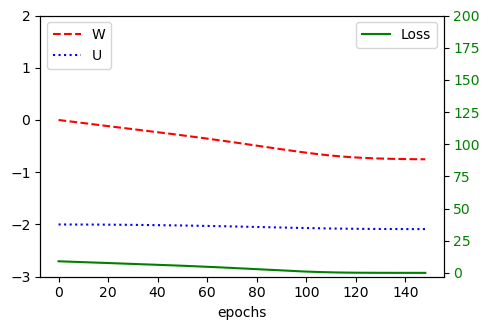

Pour le grand vecteur
(nan, nan)


/tmp/ipykernel_32/4111324607.py:8: RuntimeWarning: overflow encountered in multiply
  return x * U + s * W
/tmp/ipykernel_32/4111324607.py:33: RuntimeWarning: invalid value encountered in multiply
  gU += np.sum(gS * x[:, k - 1])
/tmp/ipykernel_32/4111324607.py:34: RuntimeWarning: invalid value encountered in multiply
  gW += np.sum(gS * s[:, k - 1])


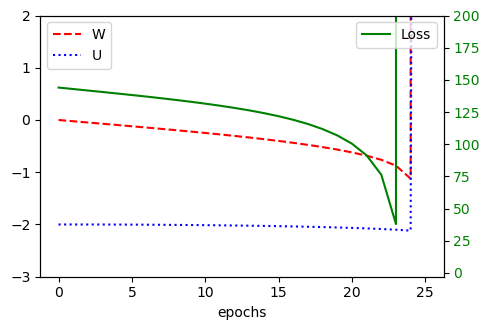

In [4]:
import numpy as np

# The first dimension represents the mini-batch
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])

def step(s, x, U, W):
    return x * U + s * W

def forward(x, U, W):
    # Number of samples in the mini-batch
    number_of_samples = len(x)
    # Length of each sample
    sequence_length = len(x[0])
    # Initialize the state activation for each sample along the sequence
    s = np.zeros((number_of_samples, sequence_length + 1))
    # Update the states over the sequence
    for t in range(0, sequence_length):
        s[:, t + 1] = step(s[:, t], x[:, t], U, W) # step function
    return s

def backward(x, s, y, W):
    sequence_length = len(x[0])
    # The network output is just the last activation of sequence
    s_t = s[:, -1]
    # Compute the gradient of the output w.r.t. MSE cost function at final state
    gS = 2 * (s_t - y)
    # Set the gradient accumulations to 0
    gU, gW = 0, 0
    # Accumulate gradients backwards
    for k in range(sequence_length, 0, -1):
        # Compute the parameter gradients and accumulate the results.
        gU += np.sum(gS * x[:, k - 1])
        gW += np.sum(gS * s[:, k - 1])
        # Compute the gradient at the output of the previous layer
        gS = gS * W
    return gU, gW


def train(x, y, epochs, learning_rate=0.0005):
    """Train the network"""
    # Set initial parameters
    weights = (-2, 0) # (U, W)
    # Accumulate the losses and their respective weights
    losses = list()
    weights_u = list()
    weights_w = list()
    # Perform iterative gradient descent
    for i in range(epochs):
        # Perform forward and backward pass to get the gradients
        s = forward(x, weights[0], weights[1])
        # Compute the MSE cost function
        loss = (y[0] - s[-1, -1]) ** 2
        # Store the loss and weights values for later display
        losses.append(loss)
        weights_u.append(weights[0])
        weights_w.append(weights[1])
        gradients = backward(x, s, y, weights[1])
        # Update each parameter `p` by p = p - (gradient * learning_rate).
        # `gp` is the gradient of parameter `p`
        weights = tuple((p - gp * learning_rate) for p, gp in
        zip(weights, gradients))
    print(weights)   
    return np.array(losses), np.array(weights_u), np.array(weights_w)


def plot_training(losses, weights_u, weights_w):
    import matplotlib.pyplot as plt
    # remove nan and inf values
    losses = losses[~np.isnan(losses)][:-1]
    weights_u = weights_u[~np.isnan(weights_u)][:-1]
    weights_w = weights_w[~np.isnan(weights_w)][:-1]
    # plot the weights U and W
    fig, ax1 = plt.subplots(figsize=(5, 3.4))
    ax1.set_ylim(-3, 2)
    ax1.set_xlabel('epochs')
    ax1.plot(weights_w, label='W', color='red', linestyle='--')
    ax1.plot(weights_u, label='U', color='blue', linestyle=':')
    ax1.legend(loc='upper left')
    # instantiate a second axis that shares the same x-axis
    # plot the loss on the second axis
    ax2 = ax1.twinx()
    # uncomment to plot exploding gradients
    ax2.set_ylim(-3, 200)
    ax2.plot(losses, label='Loss', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')
    fig.tight_layout()
    plt.show()    
    
print("Pour le petit vecteur")
losses, weights_u, weights_w = train(x, y, epochs = 150)
plot_training(losses, weights_u, weights_w) 

print("Pour le grand vecteur")
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([12])
losses, weights_u, weights_w = train(x, y, epochs = 150)
plot_training(losses, weights_u, weights_w)